# 🧬 MOPSO - Multi-Objective Particle Swarm Optimization

Ce notebook permet d'appliquer l'algorithme PSO à des **problèmes d'optimisation multi-objectifs** en fournissant **n'importe quelle fonction objectif personnalisée**. Il génère un front de Pareto pour les solutions non-dominées.


Elle permet de résoudre n'importe quel problème multi-objectifs. Il te suffit de modifier la fonction suivante :

python
Copier
Modifier

def example_objective(x):
    # Exemple : f1 = x[0], f2 = 1 - sqrt(x[0])
    return np.array([f1, f2])


In [1]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List

In [5]:
def dominates(a, b):
    return all(a <= b) and any(a < b)

def non_dominated_sort(pop):
    pareto_front = []
    for i, p in enumerate(pop):
        if not any(dominates(other, p) for j, other in enumerate(pop) if i != j):
            pareto_front.append(p)
    return np.array(pareto_front)

In [6]:
def mopso_custom_objectives(
    objective_func: Callable[[np.ndarray], np.ndarray],
    dim: int = 1,
    bounds: List[tuple] = [(0.0, 1.0)],
    num_particles: int = 50,
    iterations: int = 100,
    w: float = 0.5,
    c1: float = 1.5,
    c2: float = 1.5
):
    positions = np.random.uniform([b[0] for b in bounds], [b[1] for b in bounds], (num_particles, dim))
    velocities = np.zeros_like(positions)
    archive = []

    for _ in range(iterations):
        objectives = np.array([objective_func(p) for p in positions])
        archive = non_dominated_sort(list(archive) + list(objectives))

        for i in range(num_particles):
            leader_idx = np.random.randint(len(archive))
            leader = np.random.uniform([b[0] for b in bounds], [b[1] for b in bounds])
            r1, r2 = np.random.rand(), np.random.rand()
            velocities[i] = (w * velocities[i] +
                             c1 * r1 * (leader - positions[i]) +
                             c2 * r2 * (leader - positions[i]))
            positions[i] += velocities[i]
            positions[i] = np.clip(positions[i], [b[0] for b in bounds], [b[1] for b in bounds])

    return archive

In [16]:
# Exemple : f1 = x[0], f2 = 1 - sqrt(x[0])
def example_objective(x):
    f1 = x[0]
    f2 = 1 - np.sqrt(x[0])
    return np.array([f1, f2])

In [17]:
archive = mopso_custom_objectives(
    objective_func=example_objective,
    dim=1,
    bounds=[(0.0, 1.0)],
    num_particles=50,
    iterations=100
)

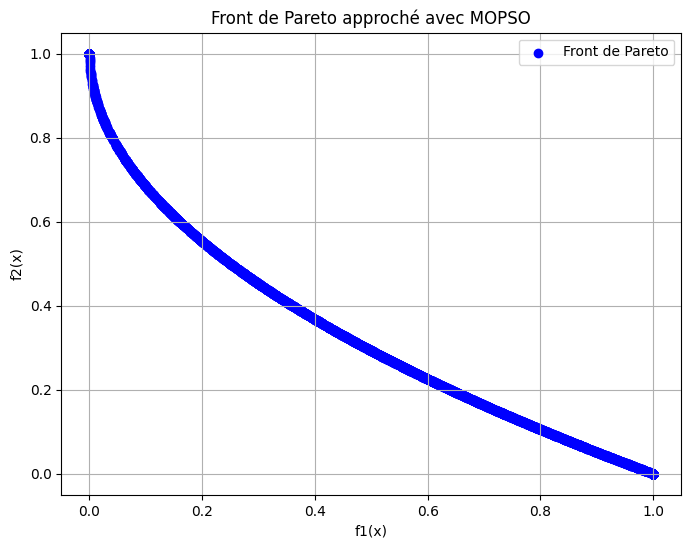

In [18]:
f1_vals = [p[0] for p in archive]
f2_vals = [p[1] for p in archive]

plt.figure(figsize=(8,6))
plt.scatter(f1_vals, f2_vals, c='blue', label="Front de Pareto")
plt.xlabel("f1(x)")
plt.ylabel("f2(x)")
plt.title("Front de Pareto approché avec MOPSO")
plt.legend()
plt.grid(True)
plt.show()